In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

# import gridtools.solps_python_scripts.setup
# from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


## Read Hermes-3

In [3]:
db = CaseDB(
    case_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\cases",
    grid_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid"
)

toload = [ 
    dict(name="m8ab", id="m8ab-noFcx_baseline_fix--BASELINE1B", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="m9a", id="m9a-albedo_0.999_tunepuff--BASELINE2A", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="m9b-fromscratch", id="m9b-albedo_0.999_tunepuff_fromscratch", unnormalise_geom = True, use_xhermes = True, squash = True), 

]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()


- Reading case m8ab-noFcx_baseline_fix--BASELINE1B
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

Unnormalising with xHermes
- Reading case m9a-albedo_0.999_tunepuff--BASELINE2A
-----------------------
- Looking for squash file
- Squash file found. squash date 03/03/2025, 12:14:23, dmp file date 03/03/2025, 11:26:09

Unnormalising with xHermes
- Reading case m9b-albedo_0.999_tunepuff_fromscratch
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

Unnormalising with xHermes


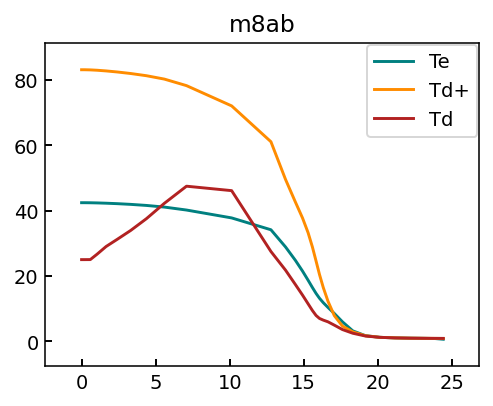

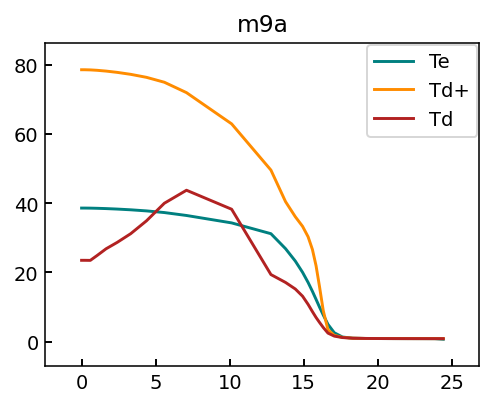

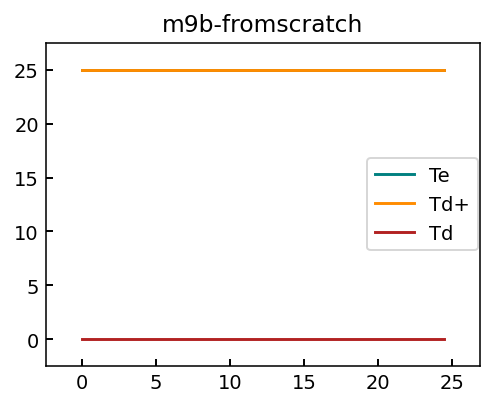

In [11]:


for name in cs:
    fig, ax = plt.subplots(figsize = (4,3))
    
    ds = cs[name].ds
    if "t" in ds.sizes:
        ds = ds.isel(t=-1)
    fl = get_1d_poloidal_data(ds, ["Te", "Td+", "Td", "Ne", "Nd", "Pe", "Pd+", "Pd"],
                                         region = "outer_lower",
                                         sepadd = 1,)
    
    
    ax.plot(fl["Spar"], fl["Te"], label = "Te")
    ax.plot(fl["Spar"], fl["Td+"], label = "Td+")
    ax.plot(fl["Spar"], fl["Td"], label = "Td")
    ax.legend()
    ax.set_title(name)

(-2.0, 0.1)

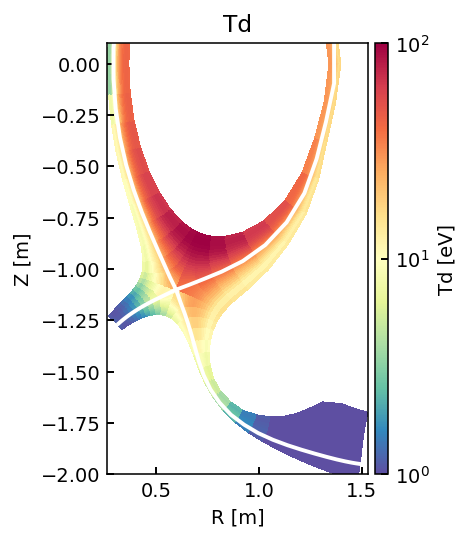

In [15]:
ds = cs["m9a"].ds.isel(t=-1)

fig, ax = plt.subplots()

ds["Td"].bout.polygon(ax = ax, cmap = "Spectral_r", logscale = True, vmin = 1, vmax = 100)

ax.set_ylim(-2, 0.1)

(-2.0, 0.1)

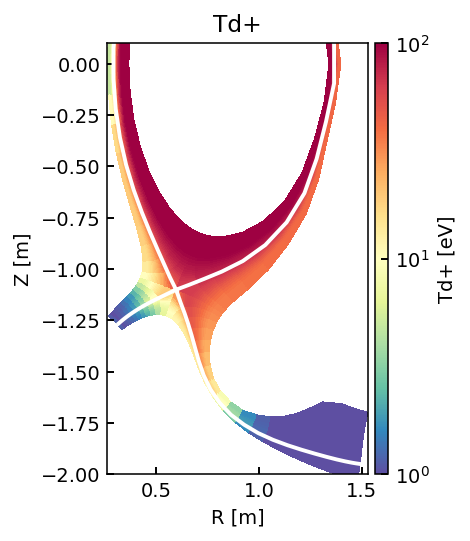

In [16]:
ds = cs["m9a"].ds.isel(t=-1)

fig, ax = plt.subplots()

ds["Td+"].bout.polygon(ax = ax, cmap = "Spectral_r", logscale = True, vmin = 1, vmax = 100)

ax.set_ylim(-2, 0.1)

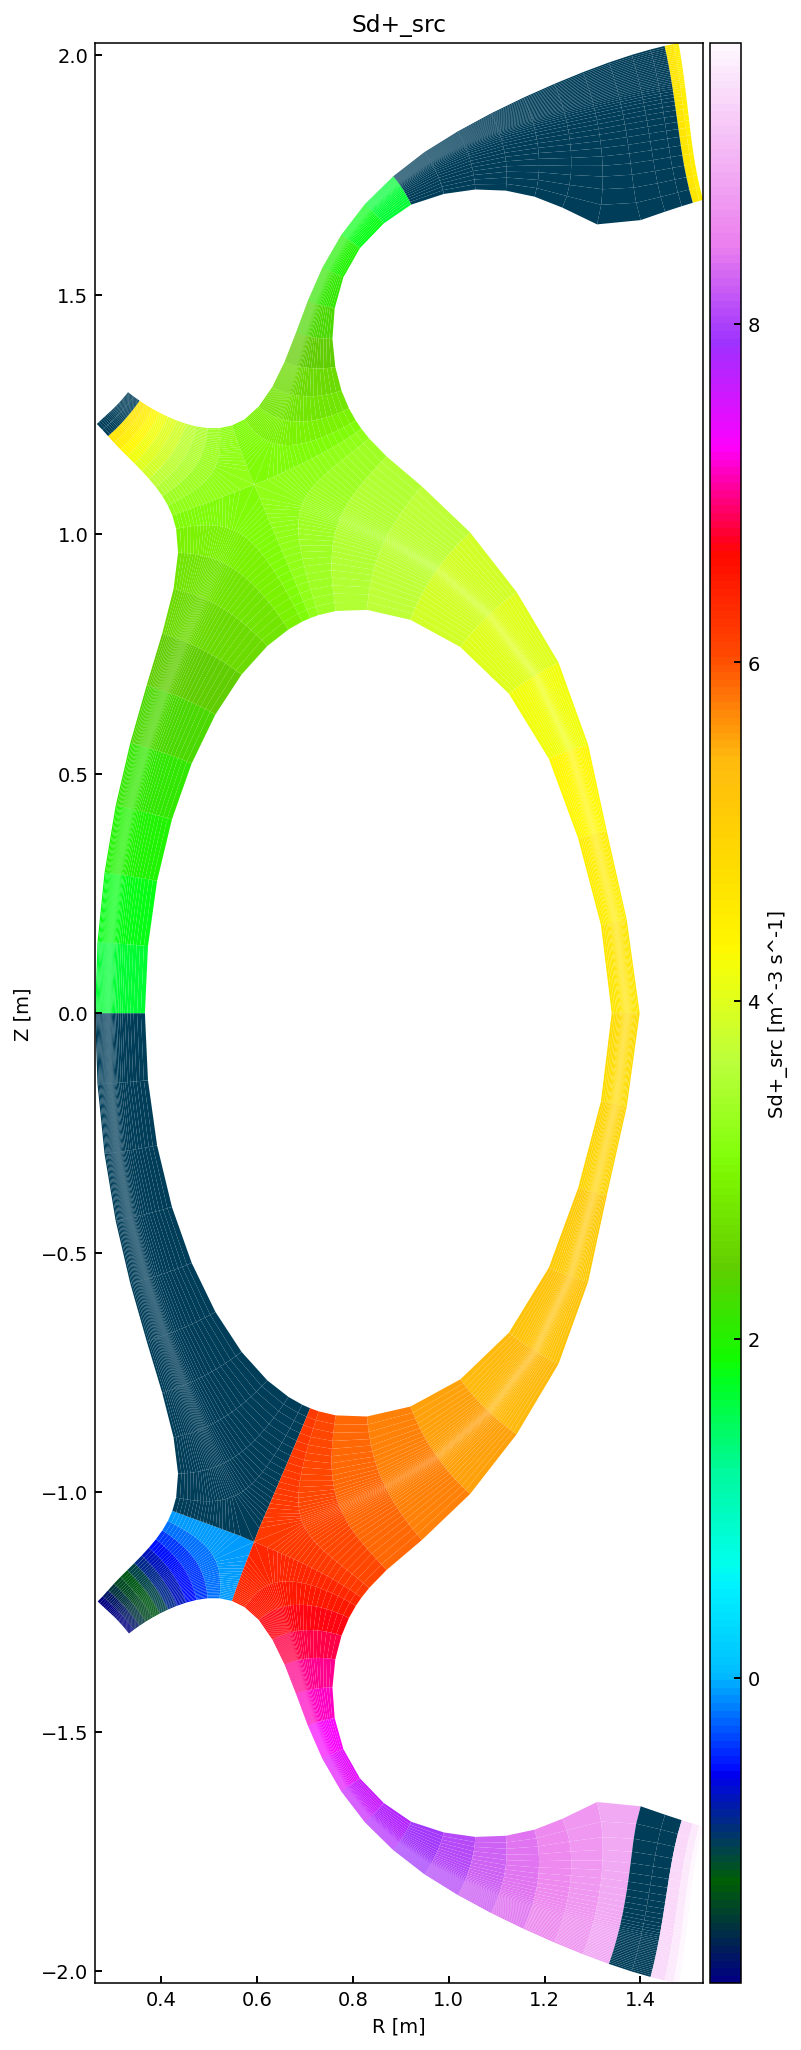

In [26]:
fig, ax = plt.subplots(figsize = (8,18))

ds = cs["test"].ds

test = ds["Sd+_src"].copy()

# REMEMBER - EQUALITY IS BACKWARDS. WHERE REPLACES VALUES THAT *DO NOT* MEET CONDITION.
mask = np.heaviside(test - 9, 0) * (1 - np.heaviside(test - 9.3, 0))
test = test.where(mask == 0, -1)

mask = np.heaviside(test - 0, 0) * (1 - np.heaviside(test - 1.5, 0))
test = test.where(mask == 0, -1)

test.bout.polygon(ax = ax, separatrix = False, antialias = True, cmap = "gist_ncar")
# ax.set_ylim(-2.2, -1.5)

In [45]:
ds["Pd+_src"].bout.polygon()?

SyntaxError: invalid syntax (3987555474.py, line 1)

In [51]:
"t" in ds.coords

True

In [35]:
ds = cs["next-tune"].ds.isel(t=-1)
core_edge = ds.hermesm.select_region("core_edge")

core_ring = ds.hermesm.select_custom_core_ring(1)
core_volume = core_edge["dv"].sum("theta").values.squeeze()

ion_heatflux = core_ring["efd+_tot_xlow"].sum("theta").values.squeeze()*1e-6
electron_heatflux = core_ring["efe_tot_xlow"].sum("theta").values.squeeze()*1e-6

ion_heat = (ds["Pd+_src"]*ds["dv"]).sum().values.squeeze() * 3/2 * 1e-6
electron_heat = (ds["Pe_src"]*ds["dv"]).sum().values.squeeze() * 3/2 * 1e-6

print(f"Core volume: {core_volume:.5f} m^3")
print(f"Ion heat: {ion_heat:.2f} MW")
print(f"Ion heatflux: {ion_heatflux:.2f} MW")

print(f"Electron heat: {electron_heat:.2f} MW")
print(f"Electron heatflux: {electron_heatflux:.2f} MW")


# ds.data_vars

Core volume: 0.17737 m^3
Ion heat: 0.30 MW
Ion heatflux: 0.29 MW
Electron heat: 0.30 MW
Electron heatflux: 0.30 MW


In [ ]:
pressure_source_norm = 

76734914.49576756

In [39]:
pressure_source_norm = ds["Pd+_src"].attrs["conversion"]

print(pressure_source_norm)
electron_heat * 1e6 / Qnorm / core_volume * 2/3

76734914.49576756


0.014694673102297988

In [21]:
nx = len(ds.coords["x"].values)
x = np.linspace(0, 1, nx)
x_bndry = (x[1] + x[2])/2
x = x - x_bndry
x

array([-0.03846154, -0.01282051,  0.01282051,  0.03846154,  0.06410256,
        0.08974359,  0.11538462,  0.14102564,  0.16666667,  0.19230769,
        0.21794872,  0.24358974,  0.26923077,  0.29487179,  0.32051282,
        0.34615385,  0.37179487,  0.3974359 ,  0.42307692,  0.44871795,
        0.47435897,  0.5       ,  0.52564103,  0.55128205,  0.57692308,
        0.6025641 ,  0.62820513,  0.65384615,  0.67948718,  0.70512821,
        0.73076923,  0.75641026,  0.78205128,  0.80769231,  0.83333333,
        0.85897436,  0.88461538,  0.91025641,  0.93589744,  0.96153846])

In [30]:
gd = nc.Dataset(r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\MAST-U\mu1af5-no_power_src.nc")

print(gd.variables.keys())
[print(x) for x in gd.variables.keys() if "src" in x]

del gd["Pd+_src"]
del gd["Pe_src"]


gd.close()

dict_keys(['nx', 'ny', 'y_boundary_guards', 'curvature_type', 'Bt_axis', 'psi_axis', 'psi_bdry', 'psi_axis_gfile', 'psi_bdry_gfile', 'Rxy', 'Rxy_xlow', 'Rxy_ylow', 'Zxy', 'Zxy_xlow', 'Zxy_ylow', 'psixy', 'psixy_xlow', 'psixy_ylow', 'dx', 'dx_xlow', 'dx_ylow', 'dy', 'dy_xlow', 'dy_ylow', 'poloidal_distance', 'poloidal_distance_xlow', 'poloidal_distance_ylow', 'Brxy', 'Brxy_xlow', 'Brxy_ylow', 'Bzxy', 'Bzxy_xlow', 'Bzxy_ylow', 'Bpxy', 'Bpxy_xlow', 'Bpxy_ylow', 'Btxy', 'Btxy_xlow', 'Btxy_ylow', 'Bxy', 'Bxy_xlow', 'Bxy_ylow', 'hy', 'hy_xlow', 'hy_ylow', 'dphidy', 'dphidy_xlow', 'dphidy_ylow', 'ShiftTorsion', 'ShiftTorsion_xlow', 'ShiftTorsion_ylow', 'zShift', 'zShift_xlow', 'zShift_ylow', 'g11', 'g11_xlow', 'g11_ylow', 'g22', 'g22_xlow', 'g22_ylow', 'g33', 'g33_xlow', 'g33_ylow', 'g12', 'g12_xlow', 'g12_ylow', 'g13', 'g13_xlow', 'g13_ylow', 'g23', 'g23_xlow', 'g23_ylow', 'J', 'J_xlow', 'J_ylow', 'g_11', 'g_11_xlow', 'g_11_ylow', 'g_22', 'g_22_xlow', 'g_22_ylow', 'g_33', 'g_33_xlow', 'g_33_

TypeError: 'netCDF4._netCDF4.Dataset' object does not support item deletion

In [32]:
gd.close()

In [33]:
# Open the original dataset in read mode
src_path = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\MAST-U\mu1af3-fix_power.nc"
dst_path = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\MAST-U\mu1af5-no_power_src.nc"

with nc.Dataset(src_path, 'r') as src, nc.Dataset(dst_path, 'w') as dst:
    # Copy global attributes
    dst.setncatts({k: src.getncattr(k) for k in src.ncattrs()})
    
    # Copy dimensions
    for name, dimension in src.dimensions.items():
        dst.createDimension(name, (len(dimension) if not dimension.isunlimited() else None))
    
    # Copy variables except the ones to be deleted
    variables_to_delete = ["Pd+_src", "Pe_src"]
    for name, variable in src.variables.items():
        if name not in variables_to_delete:
            x = dst.createVariable(name, variable.datatype, variable.dimensions)
            dst[name][:] = src[name][:]
            # Copy variable attributes
            dst[name].setncatts({k: src[name].getncattr(k) for k in src[name].ncattrs()})

print("Variables deleted and new file created successfully.")

IndexError: data can only be assigned to VLEN variables using integer indices